In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# 데이터 로딩
url = 'https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/abalone.csv'
data = pd.read_csv(url)
data = data.drop(columns='id')

# Rings 값을 3년 간격의 범주로 변환
bins = range(0, data['Rings'].max() + 3, 3)  # 3년 간격으로 구간을 생성
labels = [f'{i}-{i+2}' for i in bins[:-1]]  # 라벨 생성
data['Age_Group'] = pd.cut(data['Rings'], bins=bins, labels=labels, right=False)

# 레이블과 특성 분리
X = data.drop(['Rings', 'Age_Group'], axis=1)
y = data['Age_Group']

# 범주형 데이터 처리
X = pd.get_dummies(X, columns=['Sex'])

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\Hyeon\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
# 모델 생성 및 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [5]:
# 테스트 데이터에 대한 예측 및 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# 교차 검증
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print('Cross-validated accuracy:', np.mean(scores))

Accuracy: 0.5992822966507177


C:\Users\Hyeon\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-validated accuracy: 0.5846362776838667


In [ ]:
# 3년 간격의 균일한 범주를 생성했을 경우, 다음과 같이 60에 조금 못미치는 정확도가 나왔습니다.

# 이에, 데이터의 분포를 다음과 같이 그래프로 확인하였습니다.

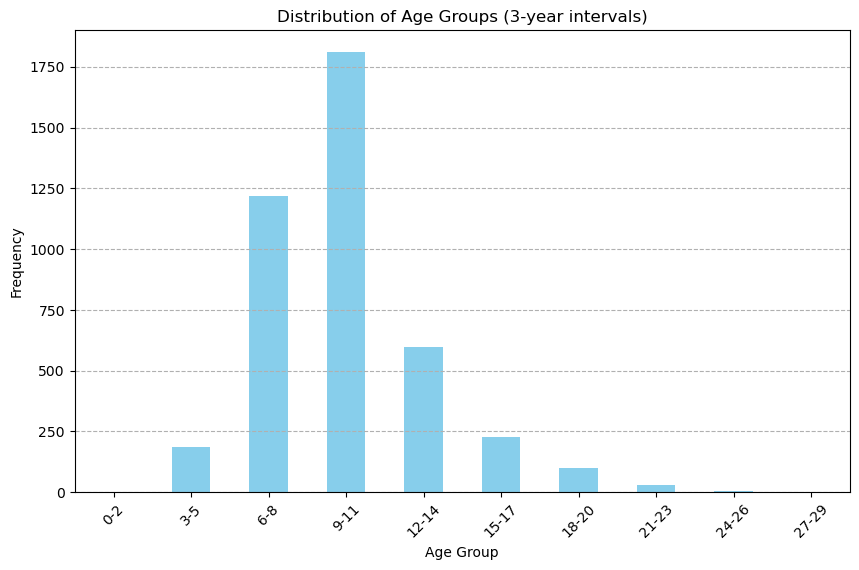

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 연령 그룹 분포 시각화
age_group_distribution = data['Age_Group'].value_counts().sort_index()

# 그래프 그리기
plt.figure(figsize=(10, 6))
age_group_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Age Groups (3-year intervals)')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

In [ ]:
# 데이터의 샘플링 편향이 존재함을 확인하고, 레이블에 샘플을 적절히 분배하기 위해 샘플이 최대한 분배되도록 레이블 분할점을 잡았습니다.

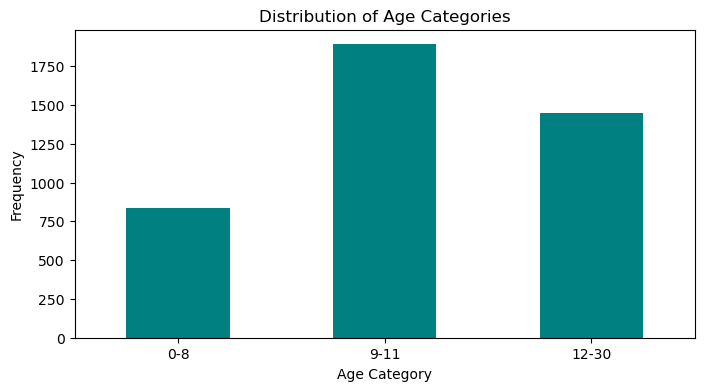

Accuracy: 0.6854066985645934


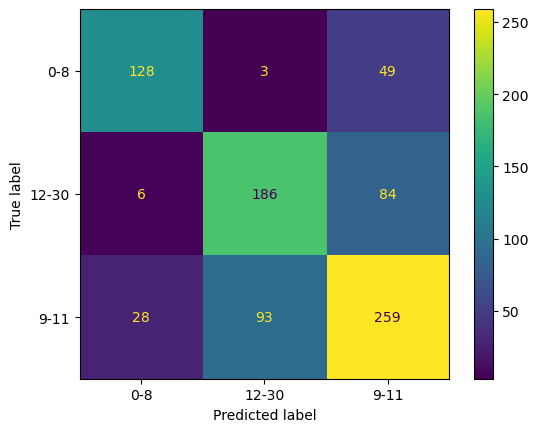

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 데이터 로딩
url = 'https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/abalone.csv'
abalone_data = pd.read_csv(url)
abalone_data = abalone_data.drop(columns='id')  # id 컬럼 제거

# Rings 값을 지정된 범주로 변환
bins = [0, 8, 11, 30]  # 범주 경계 설정
labels = ['0-8', '9-11', '12-30']  # 범주 라벨
abalone_data['Age_Category'] = pd.cut(abalone_data['Rings'], bins=bins, labels=labels, right=False)

# 연령 범주 분포 시각화
age_category_distribution = abalone_data['Age_Category'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
age_category_distribution.plot(kind='bar', color='teal')
plt.title('Distribution of Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# 레이블과 특성 분리
X = abalone_data.drop(['Rings', 'Age_Category'], axis=1)
y = abalone_data['Age_Category']

# 범주형 데이터 처리 (Sex 열)
X = pd.get_dummies(X, columns=['Sex'])

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 및 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# 혼동 행렬 시각화
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [ ]:
# 3개의 범위로 범주화,
# 데이터 샘플의 갯수에 따라 8, 11을 기준으로 3분할 하여 분류 라벨로 만들고, 이를 통해 작업을 진행하였습니다.

# 결과적으로 68% 정도까지 정확도가 올라갔습니다.